In [1]:
import pandas as pd
import numpy as np
import spacy
import seaborn as sns 
import matplotlib.pyplot as plt

In [82]:
nlp = spacy.load("en_core_web_sm")

In [3]:
data = pd.read_csv(r"Datasets\Fake News Dataset\fake_news_preprocess.csv")

In [4]:
data.head()

,id,text,Polarity
0,8476,"You Can Smell Hillary’s FearDaniel Greenfield,...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,0
2,3608,Kerry to go to Paris in gesture of sympathyU.S...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,0
4,875,The Battle of New York: Why This Primary Matte...,1


In [5]:
data.shape

(6335, 3)

In [6]:
data.replace({0: "Fake", 1:"True"}, inplace=True)

In [7]:
data.value_counts("Polarity")

Polarity
True    3171
Fake    3164
Name: count, dtype: int64

In [8]:
true_news = data[data["Polarity"]=="True"]
fake_news = data[data["Polarity"]=="Fake"]

Number of news articles 

In [9]:
true_news_number = len(true_news)
fake_news_number = len(fake_news)

In [10]:
true_news_number

3171

In [11]:
fake_news_number

3164

Extracting features with SpaCy

In [12]:
def get_spacy_feats(text, polarity):
    
    doc = nlp(text)
    
    tokens = [token for token in doc]
    
    entity_labels = ["ORG", "PERSON", "GPE", "NORP", "DATE"]
    
    entities = [ent for ent in doc.ents if ent.label_ in entity_labels]
    
    org_ents = [ent.text for ent in entities if ent.label_ == "ORG"]
    per_ents = [ent.text for ent in entities if ent.label_ == "PERSON"]
    gpe_ents = [ent.text for ent in entities if ent.label_ == "GPE"]
    norp_ents = [ent.text for ent in entities if ent.label_ == "NORP"]
    date_ents = [ent.text for ent in entities if ent.label_ == "DATE"]
    
    entity_text = [ent.text for ent in entities]
    
    n_tokens = len(tokens)
    n_org_ents = len(org_ents)
    n_per_ents = len(per_ents)
    n_gpe_ents = len(gpe_ents)
    n_norp_ents = len(norp_ents)
    n_date_ents = len(date_ents)
    
    total_n_ents = len(entity_text)
    
    ents_dict = {   "text": text,
                    "polarity": polarity,
                    "n_tokens": n_tokens,
                    "total_n_ents": total_n_ents,
                    "n_org_ents": n_org_ents,
                    "n_per_ents": n_per_ents,
                    "n_gpe_ents": n_gpe_ents,
                    "n_norp_ents": n_norp_ents,
                    "n_date_ents": n_date_ents,
                    "entities": entity_text,
                    "org_ents": org_ents,
                    "per_ents": per_ents,
                    "gpe_ents": gpe_ents,
                    "norp_ents": norp_ents,
                    "date_ents": date_ents  }
    
    return ents_dict

In [13]:
def transform_df(df):
    
    list_news_true = df[df["Polarity"] == "True"]["text"].to_list()
    list_news_fake = df[df["Polarity"] == "Fake"]["text"].to_list()
    
    processed_news_true = [get_spacy_feats(news, "True") for news in list_news_true]
    processed_news_fake = [get_spacy_feats(news, "Fake") for news in list_news_fake]
    
    merged_processed_news = processed_news_true + processed_news_fake

    transformed_df = pd.DataFrame(merged_processed_news)
    
    return transformed_df
    

In [14]:
news_processed = transform_df(data)

In [15]:
news_processed.head()

,text,polarity,n_tokens,total_n_ents,n_org_ents,n_per_ents,n_gpe_ents,n_norp_ents,n_date_ents,entities,org_ents,per_ents,gpe_ents,norp_ents,date_ents
0,Kerry to go to Paris in gesture of sympathyU.S...,True,495,58,2,17,23,6,10,"[Kerry, Paris, State, John F. Kerry, Monday, P...","[State, the American Embassy]","[Kerry, John F. Kerry, Kerry, Laurent Fabius, ...","[Paris, Paris, Paris, France, Sofia, Bulgaria,...","[American, French, Israeli, European, Indian, ...","[Monday, later this week, Sunday, Thursday, a ..."
1,The Battle of New York: Why This Primary Matte...,True,405,42,12,14,9,4,3,"[New York, Hillary Clinton, Donald Trump, Trum...","[Trump, the White House, Trump, Sanders, Trump...","[Hillary Clinton, Donald Trump, Ted Cruz, Bern...","[New York, Ohio, New York, New York, the Empir...","[Republican, Republican, Democratic, Independe...","[year, this weekend, November]"
2,‘Britain’s Schindler’ Dies at 106A Czech stock...,True,148,24,4,4,8,4,4,"[Britain, Schindler’ Dies, Czech, Jewish, Nazi...","[Schindler’ Dies, Winton, Winton, Winton]","[Dubbed “Britain’s Schindler, Nicholas Winton,...","[Britain, Nazi Germany, Prague, Germany, Czech...","[Czech, Jewish, Jewish, German]","[the age of 106, March 1939, 2003, nearly 50 y..."
3,Fact check: Trump and Clinton at the 'commande...,True,2861,298,103,87,60,12,36,"[Trump, Clinton, Clinton, Donald Trump, NBC, •...","[Trump, NBC, Trump, Obama, Trump, the Veterans...","[Clinton, Clinton, Donald Trump, • Clinton, Tr...","[Iraq, Iraq, Obama, China, Saudi Arabia, Cuba,...","[Republicans, Democratic, Republicans, Democra...","[Sept. 7, Today, Sept. 11, 2002, about six mon..."
4,Iran reportedly makes new push for uranium con...,True,813,77,12,7,39,4,15,"[Iran, U.S., Iran, the final days, The New Yor...","[The New York Times, Times, The Associated Pre...","[Olli Heinonen, John Kerry, Edward Kennedy, La...","[Iran, U.S., Iran, Tehran, Russia, Iran, Obama...","[Western, French, German, Iranian]","[the final days, late Sunday, just two days, t..."


In [16]:
news_processed.to_csv("Datasets/news_processed_spacy.csv", index=False)

Visualizing Length Distribution

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

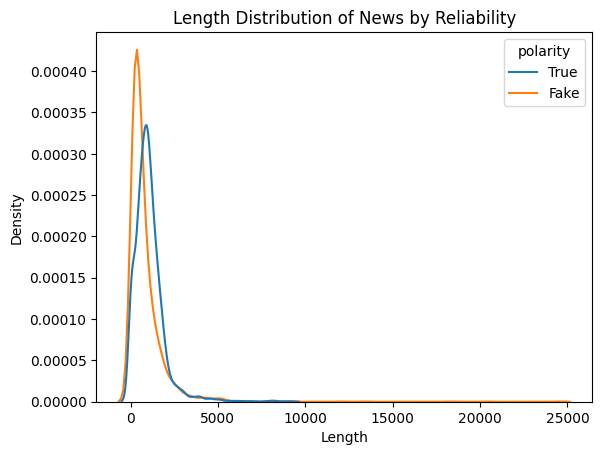

In [17]:
sns.kdeplot(data = news_processed, 
            x = "n_tokens",
            hue = "polarity")

plt.title("Length Distribution of News by Reliability")
plt.xlabel("Length")
plt.show()



c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312

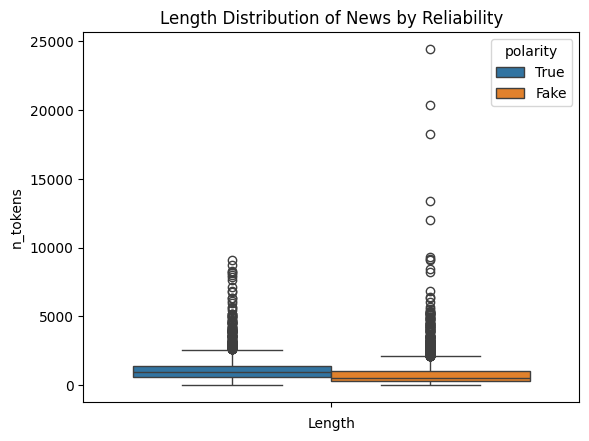

In [18]:
sns.boxplot(data = news_processed, 
            y = "n_tokens",
            hue = "polarity")

plt.title("Length Distribution of News by Reliability")
plt.xlabel("Length")
plt.show()

In [19]:
news_processed.columns

Index(['text', 'polarity', 'n_tokens', 'total_n_ents', 'n_org_ents',
       'n_per_ents', 'n_gpe_ents', 'n_norp_ents', 'n_date_ents', 'entities',
       'org_ents', 'per_ents', 'gpe_ents', 'norp_ents', 'date_ents'],
      dtype='object')

In [20]:
news_processed.pivot_table(values=['total_n_ents', 'n_org_ents', 'n_per_ents', 'n_gpe_ents', 'n_norp_ents', 'n_date_ents'], index="polarity")

,n_date_ents,n_gpe_ents,n_norp_ents,n_org_ents,n_per_ents,total_n_ents
polarity,,,,,,
Fake,7.063843,10.205752,5.833439,13.765171,13.524652,50.392857
True,11.882371,14.360139,8.674551,19.376222,21.204667,75.497950


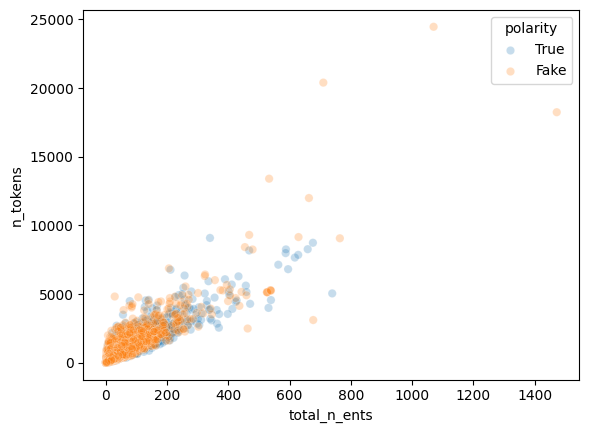

In [21]:
# get catplot true/fake for each n_ent instead
sns.scatterplot(data=news_processed, x="total_n_ents", y="n_tokens", hue="polarity", alpha=0.25)
plt.show()

In [22]:
corr_df = news_processed.select_dtypes(include=np.number).corr()
corr_df

,n_tokens,total_n_ents,n_org_ents,n_per_ents,n_gpe_ents,n_norp_ents,n_date_ents
n_tokens,1.000000,0.879262,0.772974,0.754392,0.710558,0.628166,0.771179
total_n_ents,0.879262,1.000000,0.867390,0.870172,0.815165,0.728296,0.846463
n_org_ents,0.772974,0.867390,1.000000,0.748696,0.575713,0.485874,0.706528
n_per_ents,0.754392,0.870172,0.748696,1.000000,0.554002,0.492809,0.706199
n_gpe_ents,0.710558,0.815165,0.575713,0.554002,1.000000,0.618255,0.631460
n_norp_ents,0.628166,0.728296,0.485874,0.492809,0.618255,1.000000,0.545100
n_date_ents,0.771179,0.846463,0.706528,0.706199,0.631460,0.545100,1.000000


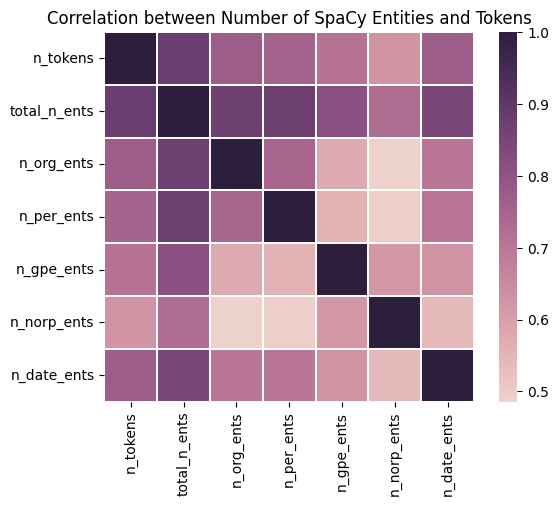

In [23]:
cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(corr_df, linewidths=0.004, square=True, cmap = cmap, cbar = True)

plt.title("Correlation between Number of SpaCy Entities and Tokens")

plt.show()

Entity Analysis

In [35]:
true_news_entities = news_processed[news_processed["polarity"] == "True"]["entities"].to_list()
fake_news_entities = news_processed[news_processed["polarity"] == "Fake"]["entities"].to_list()

In [40]:
len(true_news_entities)

3171

In [38]:
import itertools

true_news_entities_list = list(itertools.chain.from_iterable(true_news_entities))
fake_news_entities_list = list(itertools.chain.from_iterable(fake_news_entities))


In [41]:
len(true_news_entities_list)

239404

Entities can be multi-word so if we don't create unique "fake one word" tokens, the components of the entity will be split and not counted as an actual single entity. In order to fed a string to the WordCloud Object, I will join the words by a "_"

In [53]:
true_news_entities_list[0:5]

['Kerry', 'Paris', 'State', 'John F. Kerry', 'Monday']

In [47]:
processed_entities_true = [ent.replace(" ", "_") for ent in true_news_entities_list]
processed_entities_fake = [ent.replace(" ", "_") for ent in fake_news_entities_list]

In [48]:
processed_entities_true[0:5]

['Kerry', 'Paris', 'State', 'John_F._Kerry', 'Monday']

In [56]:
differential_ents_true = [ent for ent in processed_entities_true if ent not in set(processed_entities_fake)]
differential_ents_fake = [ent for ent in processed_entities_fake if ent not in set(processed_entities_true)]

Visualizing the WordClouds

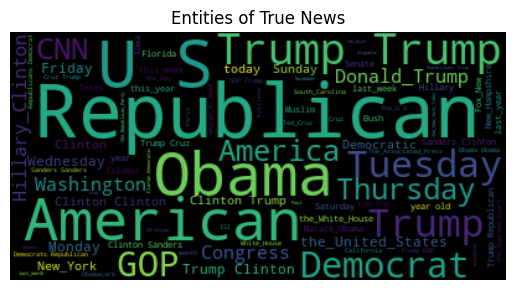

In [52]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud_true = WordCloud().generate(" ".join(processed_entities_true))

plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title("Entities of True News")
plt.axis("off")
plt.show()



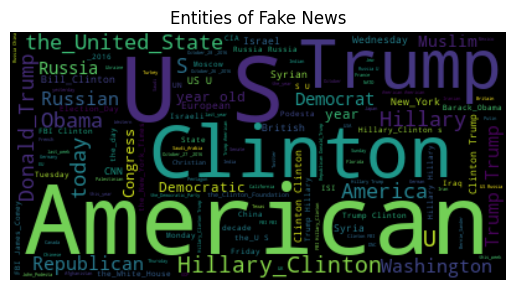

In [51]:
wordcloud_fake = WordCloud().generate(" ".join(processed_entities_fake))

plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title("Entities of Fake News")
plt.axis("off")
plt.show()

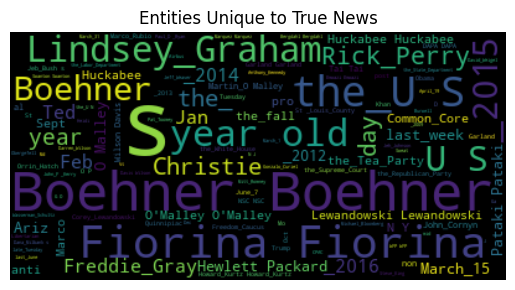

In [83]:
wordcloud_true_difference = WordCloud().generate(" ".join(differential_ents_true))

plt.imshow(wordcloud_true_difference, interpolation='bilinear')
plt.title("Entities Unique to True News")
plt.axis("off")
plt.show()

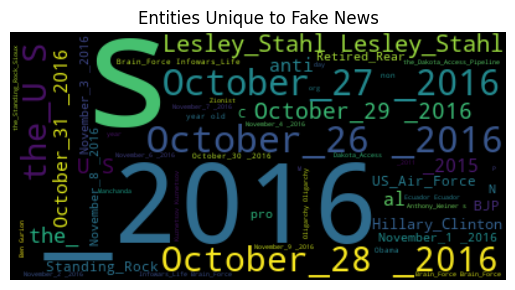

In [84]:
wordcloud_fake_difference = WordCloud().generate(" ".join(differential_ents_fake))

plt.imshow(wordcloud_fake_difference, interpolation='bilinear')
plt.title("Entities Unique to Fake News")
plt.axis("off")
plt.show()

Vocabulary Analysis

In [62]:
list_true_news = news_processed[news_processed["polarity"] == "True"]["text"].to_list()

list_fake_news = news_processed[news_processed["polarity"] == "Fake"]["text"].to_list()

In [65]:
# str_true_news[0:300]

In [85]:
disable = ["ner", "parser"] # disabling to speed up the processing
nlp.disable_pipes(disable)

['ner', 'parser']

In [86]:
nlp.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']

In [88]:
true_news_docs = [nlp(doc) for doc in list_true_news]
fake_news_docs = [nlp(doc) for doc in list_fake_news]

In [98]:
lemmas_true_news = []
for doc in true_news_docs:
    lemmas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    lemmas_true_news.append(lemmas)

lemmas_fake_news = []
for doc in fake_news_docs:
    lemmas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    lemmas_fake_news.append(lemmas)

In [99]:
lemmas_true_news = list(itertools.chain.from_iterable(lemmas_true_news))
lemmas_fake_news = list(itertools.chain.from_iterable(lemmas_fake_news))

In [100]:
len(lemmas_true_news)

1525846

In [101]:
len(lemmas_fake_news)

1171142

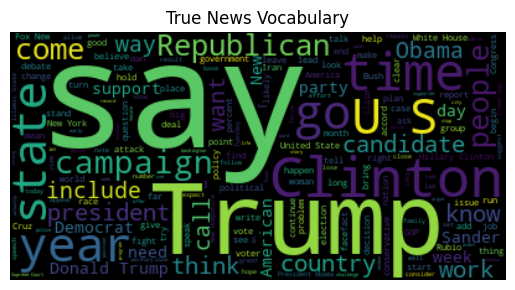

In [102]:
wordcloud_lemmas_true = WordCloud().generate(" ".join(lemmas_true_news))

plt.imshow(wordcloud_lemmas_true, interpolation='bilinear')
plt.title("True News Vocabulary")
plt.axis("off")
plt.show()

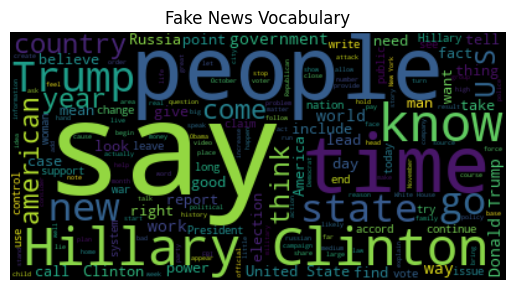

In [103]:
wordcloud_lemmas_fake = WordCloud().generate(" ".join(lemmas_fake_news))

plt.imshow(wordcloud_lemmas_fake, interpolation='bilinear')
plt.title("Fake News Vocabulary")
plt.axis("off")
plt.show()

In [104]:
differential_lemmas_true = [ent for ent in lemmas_true_news if ent not in set(lemmas_fake_news)]
differential_lemmas_fake = [ent for ent in lemmas_fake_news if ent not in set(lemmas_true_news)]

KeyboardInterrupt: 

In [ ]:
wordcloud_lemmas_true_diff = WordCloud().generate(" ".join(differential_lemmas_true))

plt.imshow(wordcloud_lemmas_true_diff, interpolation='bilinear')
plt.title("True News Unique Vocabulary")
plt.axis("off")
plt.show()

In [ ]:
wordcloud_lemmas_fake_diff = WordCloud().generate(" ".join(differential_lemmas_fake))

plt.imshow(wordcloud_lemmas_fake_diff, interpolation='bilinear')
plt.title("Fake News Unique Vocabulary")
plt.axis("off")
plt.show()